In [1]:
import pandas as pd
import numpy as np
import matplotlib
import nltk

In [71]:
df=pd.read_csv('/Users/trishashishodiya/Documents/My projects/Dallas Cafe Crawling/Cafe Reviews Scraping-latest.csv')

In [3]:
df.head()

,Cafe name,Review Text,Rating,Address,Neighbourhood,Price,Atmosphere,Service,Service Type
0,LDU Coffee To Go,Love the coffee and service is pleasant and qu...,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out
1,LDU Coffee To Go,Have gone here 2 days in a row. Tried a latte ...,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out
2,LDU Coffee To Go,It’s open. Nice location! Nice staff!,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out
3,LDU Coffee To Go,"It may not be open yet, but you know it will b...",5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,NaN
4,LDU Coffee To Go,Why is this location even listed? It’s not eve...,1.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,NaN,NaN,NaN


In [73]:
#removing duplicates
df = df.drop_duplicates()

<Axes: title={'center': 'Count of reviews by stars'}, xlabel='Rating'>

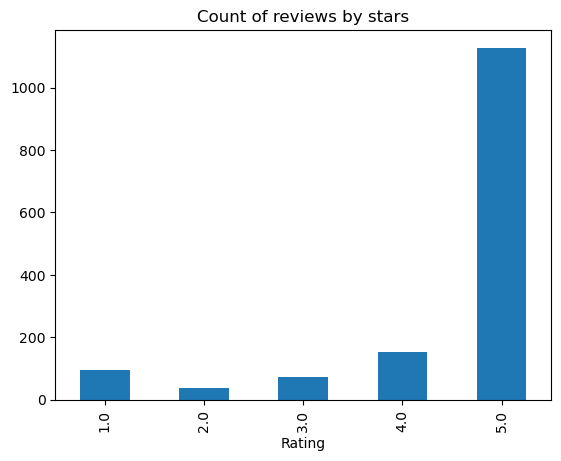

In [5]:
df['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars')

In [6]:
df['Rating'].value_counts()

Rating
5.0    1128
4.0     154
1.0      94
3.0      73
2.0      36
Name: count, dtype: int64

In [75]:
df.drop(df[df['Rating'] == 'Rating'].index, inplace=True)

In [8]:
example_review=df['Review Text'][98]
example_review

'We loved having Lemon Drop Coffee cater a pop up event for us at our apartment complex. The entire booking process was stress free, simple, & clear. Ryan had excellent communication throughout the process and great execution day of the event. Coffee was delicious with several dairy free options as well as yummy syrups. Cannot recommend him enough!'

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trishashishodiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
tokens=nltk.word_tokenize(example_review)
#tokens are used to convert words to a form the computer can understand
tokens

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/trishashishodiya/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:

nltk.download('averaged_perceptron_tagger')

In [ ]:
tagged=nltk.pos_tag(tokens)
#part of speech
tagged

In [ ]:
nltk.download('words')
nltk.download('maxent_ne_chunker')

In [ ]:
entity=nltk.chunk.ne_chunk(tagged)
entity

Everything above this was a trial and has nothing to do with the following lines of code.
Below you fill find Topic Modeling with BERTopic


Topic Modeling: BERTopic


In [ ]:
pip install bertopic

In [ ]:
pip install scikit-learn==1.2.2 hdbscan bertopic --upgrade

In [ ]:
from bertopic import BERTopic

In [77]:
df = df[df['Review Text'].notna() & (df['Review Text'].str.strip() != '')]

In [79]:
df['Review Text'] = df['Review Text'].astype(str)
#make everyhing a string since we are getting errors of some values being float

In [81]:
reviews=pd.Series(df['Review Text'])
reviews

0       Love the coffee and service is pleasant and qu...
1       Have gone here 2 days in a row. Tried a latte ...
2                   It’s open. Nice location! Nice staff!
3       It may not be open yet, but you know it will b...
4       Why is this location even listed? It’s not eve...
                              ...                        
2095    Pretty cool places with ice cream and crepes. ...
2096    Visiting the area for a few days and was looki...
2097    This… this is the place to go for ice cream, c...
2098    This is a very late review. Deserts were fresh...
2099    Best crepes! I ordered the Strawberry banana N...
Name: Review Text, Length: 1481, dtype: object

In [ ]:
topic_model=BERTopic(nr_topics=50, embedding_model='all-MiniLM-L6-v2', language='english')
#creating the model

In [ ]:
#training the model
topic, probs=topic_model.fit_transform(reviews)
#fitting the model, probs is the probability for how much a review belongs to a topic

In [ ]:
topic_model.get_topic_info()

In [ ]:
topic_model.get_topic_info()['Representation'][28]

In [ ]:
topic_model.get_topic_info()['Representative_Docs'][28]

In [ ]:
#get topic names
topic_info=topic_model.get_topic_info()
topic_id_to_name={row['Topic']: row['Name'] for _, row in topic_info.iterrows()}

In [ ]:
#creating the final data frame
df_topics=pd.DataFrame({'reviews':reviews, 'topic_id':topic})
df_topics['topic_name']=df_topics['topic_id'].map(topic_id_to_name)

In [ ]:
df_topics

In [ ]:
df.shape

The above approach didn't work either.
Now, I will try sentence transformation

Sentence Transformation

In [36]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
keywords = [
    "pet friendly", "dog friendly", "cat friendly", "allows pets", "pups allowed", "animals welcome", "pet owners", "fur babies", "pet cups",
    "cozy", "comfy", "comfortable", "snug", "warm vibe", "welcoming", "relaxing", "intimate", "chill atmosphere", "homey",
    "parking", "parking lot", "parking spaces", "easy parking", "free parking", "street parking", "parking available", "car friendly", "parking issues", "no parking",
    "outdoor seating", "patio", "outside seating", "garden seating", "open air seating", "terrace", "fresh air seating", "al fresco", "outdoor tables",
    "seating", "seats", "tables", "chairs", "booths", "layout", "space to sit", "room to sit", "seating options", "crowded seating",
    "best seller", "favorite drink", "must try", "recommended", "popular item", "top pick", "fan favorite", "signature drink", "go-to order", "crowd favorite",
    "amazing", "great", "excellent", "love", "favorite", "highly recommend", "perfect", "best", "delicious", "fantastic",
    "bad", "worst", "terrible", "overpriced", "noisy", "slow service", "dirty", "uncomfortable", "crowded", "problem"
]

In [ ]:
#loading model
model = SentenceTransformer('all-MiniLM-L6-v2') 

In [ ]:
reviews = df['Review Text'].tolist()

In [ ]:
#Encode keywords & reviews

keyword_embeddings = model.encode(keywords, convert_to_tensor=True)
review_embeddings = model.encode(reviews, convert_to_tensor=True)

In [ ]:
# Find closest keyword for each review
tags = []
threshold = 0.5  # adjust: 0.5=looser, 0.7=stricter

for emb in review_embeddings:
    similarities = util.cos_sim(emb, keyword_embeddings)[0]
    best_idx = similarities.argmax().item()
    best_score = similarities[best_idx].item()
    if best_score >= threshold:
        tags.append(keywords[best_idx])
    else:
        tags.append(None)

In [ ]:
#final dataframe
df['Tag'] = tags
df.to_csv("tagged_reviews.csv", index=False)

print(df[['Review Text', 'Tag']].head(10))

In [ ]:
for review, emb in zip(reviews, review_embeddings):
    similarities = util.cos_sim(emb, keyword_embeddings)[0]
    best_idx = similarities.argmax().item()
    best_score = similarities[best_idx].item()
    if best_score >= 0.3:
        print(f"\nReview: {review}\nBest Match: {keywords[best_idx]} (score: {best_score:.2f})")

This is not working either

In [ ]:
pip install thefuzz

In [ ]:
pip install textblob

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trishashishodiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from textblob import TextBlob  # For sentiment

# Safe sentence tokenizer fallback
def safe_sent_tokenize(text):
    try:
        return sent_tokenize(text)
    except LookupError:
        return [s.strip() for s in text.split('.') if s.strip()]

# Keywords for tagging
keywords = {
    'dog friendly': ['dog', 'dogs', 'puppy', 'pet', 'pets', 'pup cup'],
    'cozy': ['cozy', 'comfortable', 'comfy', 'warm', 'inviting', 'ambient', 'relaxing'],
    'parking': ['parking', 'parked', 'garage', 'lot'],
    'patio': ['patio', 'outside', 'outdoor', 'deck', 'terrace'],
    'pet friendly': ['pet friendly', 'pet-friendly', 'pets allowed', 'pet friendly'],
    # Add more tags and keywords here
}

def classify_review(review_text, threshold=0.2):
    if not isinstance(review_text, str) or not review_text.strip():
        return None, None

    sentences = safe_sent_tokenize(review_text.lower())

    best_tag = None
    best_score = 0

    # Check keyword matches
    for tag, words in keywords.items():
        count = sum(any(word in sentence for word in words) for sentence in sentences)
        score = count / len(sentences) if sentences else 0
        if score > best_score and score >= threshold:
            best_score = score
            best_tag = tag

    # Sentiment analysis using TextBlob
    sentiment_score = TextBlob(review_text).sentiment.polarity
    if sentiment_score > 0.1:
        sentiment = 'positive'
    elif sentiment_score < -0.1:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return best_tag, sentiment

# Assuming df is your DataFrame and 'Review' is the review text column
df['Tag'], df['Sentiment'] = zip(*df['Review'].map(classify_review))

print(df[['Review', 'Tag', 'Sentiment']].head(100))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trishashishodiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               Review   Tag Sentiment
0   Love the coffee and service is pleasant and qu...  None  positive
1   Have gone here 2 days in a row. Tried a latte ...  None  positive
2               It’s open. Nice location! Nice staff!  None  positive
3   It may not be open yet, but you know it will b...  None  positive
4   Why is this location even listed? It’s not eve...  None   neutral
..                                                ...   ...       ...
95  We loved having Lemon Drop Coffee cater a pop ...  None  positive
96  We've hired Lemmon Drop for three corporate ev...  None  positive
97  If you’re looking to instantly upgrade your of...  None  positive
98  I have not visited Lemmon Drop yet. I purchase...  None  positive
99  We used Lemmon Drop for a few tenant events at...  None  positive

[100 rows x 3 columns]


This did not work either

Approach 5:


In [61]:
keywords = {
    'dog friendly': ['dog', 'dogs', 'puppy', 'pet', 'pets', 'pup cup'],
    'cozy': ['cozy', 'comfortable', 'comfy', 'warm', 'inviting', 'relaxing', 'homey', 'snug'],
    'parking': ['parking', 'parked', 'garage', 'lot', 'spaces', 'spots'],
    'patio': ['patio', 'outside', 'outdoor', 'deck', 'terrace', 'garden'],
    'pet friendly': ['pet friendly', 'pet-friendly', 'pets allowed'],
}

In [63]:
def assign_tag(review):
    review_lower = str(review).lower()
    for tag, kws in keywords.items():
        for kw in kws:
            if kw in review_lower:
                return tag
    return None

In [65]:
positive_words = ['love', 'great', 'good', 'amazing', 'best', 'friendly', 'delicious', 'excellent']
negative_words = ['worst', 'bad', 'poor', 'overpriced', 'rude', 'disappointing']

def simple_sentiment(review):
    review_lower = str(review).lower()
    pos_count = sum(review_lower.count(w) for w in positive_words)
    neg_count = sum(review_lower.count(w) for w in negative_words)
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

In [67]:
df['Tag'] = df['Review'].apply(assign_tag)
df['Sentiment'] = df['Review'].apply(simple_sentiment)

In [69]:
# Print the first 10 rows showing Review, Tag, and Sentiment columns
print(df[['Review', 'Tag', 'Sentiment']].head(10))

                                              Review   Tag Sentiment
0  Love the coffee and service is pleasant and qu...  None  positive
1  Have gone here 2 days in a row. Tried a latte ...  None  positive
2              It’s open. Nice location! Nice staff!  None   neutral
3  It may not be open yet, but you know it will b...  None  positive
4  Why is this location even listed? It’s not eve...  None   neutral
5               Loved this place and friends hosts !  None  positive
6                              Best coffee in Dallas  None  positive
7  This was the worst cappuccino I’ve ever had. I...  None  negative
8  I stopped by for my birthday drink today in th...  None   neutral
9  When I pulled into this Starbucks, I really ha...  None   neutral


In [229]:
import pandas as pd
import re

# Make sure 'Tag' is initialized as empty lists
df['Tag'] = [[] for _ in range(len(df))]

# Expanded keyword mapping
keywords = {
    'pet friendly': r'dog|pup|puppy|pet|fur baby|furbaby|pup cup|dogs allowed|pets allowed|pet-friendly|dog-friendly|leash|furry friends',
    'cozy': r'cozy|vibe|vibes|ambience|ambiance|atmosphere|warm|intimate|cute|inviting|homey|charming|decor|decorated|aesthetic|spacious|perfect spot',
    'parking': r'parking|park|car lot|garage|valet',
    'study/work': r'study|laptop|wifi|internet|work|read|quiet|focus|desk|outlets|socket|power',
    'late hours': r'open late|till late|24 hours|midnight|late night|night owl|after hours',
    'highlights': r'best|favorite|favourite|amazing|awesome|specialty|known for|highlight|must try|signature|go to|standout|love|sweet|friendly|positive|like|kind|energetic|correctly|stood out|excellent|bravo|tasty|fantastic|pleasure|lovely|5-star|hidden gem|great|helpful|delightful|beautiful|shoutout|cool',
    'recommendations': r'recommend|suggest|should try|you must|i would|worth trying|try the|order the|go for|get the|love|delicious|nice|loved|liked|satiated|enjoyed|knowledgeable|good|yummy|flavourful',
    'issues': r'bad|poor|rude|slow|cold|overpriced|expensive|dirty|long wait|disappointed|problem|complain|worst|not good|terrible|awful|failed|screw|ridiculous|let down|bothered|unfriendly|wrong|zero coffee knowledge|lazy|sad|dingy|unsettling|horrendous|sucks|be aware|unorganized',
    'healthy options': r'healthy|vegan|gluten[- ]?free|organic|plant[- ]?based|low[- ]?sugar|low[- ]?fat|dairy[- ]?free|keto|paleo|salad|smoothie|fresh juice|green juice|protein|whole[- ]?grain|acai|bowls|nutritious|light meal|superfood'
}

# Tagging: allow multiple tags
for tag, pattern in keywords.items():
    matches = df['Review Text'].str.contains(pattern, case=False, na=False)
    df.loc[matches, 'Tag'] = df.loc[matches, 'Tag'].apply(lambda x: x + [tag])

# Optionally replace empty lists with None for clarity
df['Tag'] = df['Tag'].apply(lambda x: x if x else None)

# Make a new dataframe with just Review Text and Tag
review_tags_df = df[['Review Text', 'Tag']].copy()

# Preview the updated dataframe
print(review_tags_df)

pd.set_option('display.max_colwidth', None)
display(review_tags_df.sample(10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                 Love the coffee and service is pleasant and quick. Wish more b

,Review Text,Tag
1784,Incredibly friendly staff and knowledgeable about their daily offerings. I felt right at home and enjoyed my time to relax in their comfortable café. The coffee and pastry were very tasty indeed!,"[highlights, recommendations]"
2081,"I'm getting into the at home coffee scene & wanted the best beans to use for my new at home espresso machine. This is the BEST place in town to get your freshly roasted coffee beans & they even give you a free drink when you buy coffee beans from them! How totally awesome is that? I will totally be back, so glad a place like this is in Richardson! Very knowledgeable staff & I got to see the roasting equipment real neat!","[highlights, recommendations]"
717,"I myself am a barista, so I’m very picky. But when I tell you this place is amazing, it’s amazing!!! It’s adorable, the staff is so friendly, they roast their own coffee. It couldn’t get any better. Thank you guys for your work.","[study/work, highlights]"
1183,I loved the coffee shop. The decor is simple but classy. Staff is very friendly. We ordered yogurt parfait and hot chocolate. Both were really good. Large windows to let the light in. Sofas for the patrons to sit comfortably in.\nLot of parking on site.\nThe location is also perfect. It's a 5-minute drive away from grapevine mills mall or even rockledge park.\nVery nice place to hangout or work.,"[cozy, parking, study/work, highlights, recommendations]"
1018,"This place is so overhyped and I cannot figure out why. As soon as you walk in, you are greeted with what looks like an incomplete shop that is bare and looks like a work in progress. The staff fo their job but dont feel very welcoming. Their food selection is terrible and not at all appetizing. Their matcha that people on social media raves about are super mediocre, and priced higher than what it should be for what you get. I drove 45 min with high expectations only to be severely let down on all fronts. There's nothing special or noteworthy about this place that deserves more than average ratings.","[pet friendly, study/work, highlights, issues]"
1532,"This is a solid coffee shop. The lattes were tasty. The service was friendly. We came here to do some remote work, but it was packed so a little hard to find enough space. It’s a good sign when a place is very busy although it can get a bit loud when you’re trying to work. I’d recommend that they get a larger food menu for breakfast, because we were limited to avocado toast or a pastry. The toast was okay but not very filling.","[study/work, highlights, recommendations]"
1520,"Escape 360 in McKinney is definitely worth a visit! The place is spacious and modern, even though it gets pretty crowded—especially on weekends. The food was delicious and fresh, and while the prices are a bit higher than some other spots, the quality makes up for it.\n\nI really enjoyed the overall vibe, but one downside was the 18% service fee added to the bill. Also, having to scan a QR code to order from your phone felt a little impersonal, especially since dine-in customers are expected to order that way. I was told the counter ordering is only for to-go orders, which was a bit confusing.\n\nStill, if you're looking for a trendy and tasty spot in McKinney, this is a great choice. Just be prepared for the tech-based ordering!","[cozy, highlights, recommendations]"
92,Very hipster vibes with decent coffee and pastries. Nice for a mellow Saturday morning.,"[cozy, recommendations]"
1973,One of the best cafes in heart of Frisco! It is only few blocks away from downtown Frisco. I always look for a cafe where provide its own unique specialty drinks; and this spot does! Their drinks menu is creative and fun. The peach mango smoothie and lavender latte are now my favorite. Also I really liked their white & green interior. Highly recommend stopping by if you’re in the area!,"[highlights, recommendations, healthy options]"
916,"This is a cozy local coffee shop filled with great food and sweet s

In [231]:
print(review_tags_df[review_tags_df['Tag'].isnull()].count())

Review Text    9
Tag            0
dtype: int64


In [239]:
df.head(20)

,Cafe name,Review Text,Rating,Address,Neighbourhood,Price,Atmosphere,Service,Service Type,Tag,pet friendly,cozy,parking,study/work,late hours,highlights,recommendations,issues,healthy options
0,LDU Coffee To Go,Love the coffee and service is pleasant and quick. Wish more businesses adopted this kind of model for services and prices. I’d rather pay a higher base price to support living wages and expenses for great products like theirs,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out,"[highlights, recommendations]",0,0,0,0,0,1,1,0,0
1,LDU Coffee To Go,Have gone here 2 days in a row. Tried a latte and a matcha. Both were equally delicious! The baristas were very informative and I love their menu.,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out,"[highlights, recommendations]",0,0,0,0,0,1,1,0,0
2,LDU Coffee To Go,It’s open. Nice location! Nice staff!,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out,[recommendations],0,0,0,0,0,0,1,0,0
3,LDU Coffee To Go,"It may not be open yet, but you know it will be amazing just like all the other locations in Dallas!",5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,NaN,[highlights],0,0,0,0,0,1,0,0,0
4,LDU Coffee To Go,Why is this location even listed? It’s not even open yet.,1.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,NaN,NaN,NaN,None,0,0,0,0,0,0,0,0,0
5,LDU Coffee To Go,Loved this place and friends hosts !,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,NaN,"[highlights, recommendations]",0,0,0,0,0,1,1,0,0
6,LDU Coffee To Go,Best coffee in Dallas,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,NaN,[highlights],0,0,0,0,0,1,0,0,0
10,Starbucks,"This was the worst cappuccino I’ve ever had. It was basically just coffee with barely any milk foam — definitely not what a cappuccino should be. On top of that, the cup didn’t have the heat-protective sleeve, so it was burning hot to hold. Very disappointing experience at Starbucks today.",1.0,"2800 Oak Lawn Ave, Dallas, TX 75219",Oak Lawn,$1–10,1.0,1.0,NaN,[issues],0,0,0,0,0,0,0,1,0
11,Starbucks,"I stopped by for my birthday drink today in the morning, OMG the staff was very sweet. I was surprised to see “Happy Birthday” on my cup. I was such a small gesture but it make me feel extra special and made my day! Thank you for the thoughtfull gesture!",5.0,"2800 Oak Lawn Ave, Dallas, TX 75219",Oak Lawn,$1–10,NaN,5.0,NaN,[highlights],0,0,0,0,0,1,0,0,0
12,Starbucks,"When I pulled into this Starbucks, I really had to use the restroom in a hurry. I saw there were locks on the doors, so I told the cashier I was going to get something to eat and drink but I really needed to get into the restroom. But, no, I had to order first. So I quickly chose a coffee and something to eat, and then she condescended to give me the combination to the restroom. I would really have liked to have a minute or so to look at what they had to offer to eat, but I must have looked like one of those people who wanted to take advantage of their bathroom for who knows what. Apparently there is no room in their silly policy, or in that cashier, for mercy.",1.0,"2800 Oak Lawn Ave, Dallas, TX 75219",Oak Lawn,$1–10,4.0,1.0,Take out,"[highlights, recommendations]",0,0,0,0,0,1,1,0,0


In [237]:
#multi label one hot encoding

# List of all tags you used
tag_columns = list(keywords.keys())

# Create a column for each tag, mark 1 if present in Tag list else 0
for tag in tag_columns:
    df[tag] = df['Tag'].apply(lambda x: 1 if x and tag in x else 0)

print(df.head())

          Cafe name  \
0  LDU Coffee To Go   
1  LDU Coffee To Go   
2  LDU Coffee To Go   
3  LDU Coffee To Go   
4  LDU Coffee To Go   

                                                                                                                                                                                                                          Review Text  \
0  Love the coffee and service is pleasant and quick. Wish more businesses adopted this kind of model for services and prices. I’d rather pay a higher base price to support living wages and expenses for great products like theirs   
1                                                                                  Have gone here 2 days in a row. Tried a latte and a matcha. Both were equally delicious! The baristas were very informative and I love their menu.   
2                                                                                                                                                                 

In [243]:
import pandas as pd

# assuming your dataframe is df with 'Address' column
df['Suburb'] = df['Address'].str.split(',').str[1].str.strip()

# Preview
print(df[['Address', 'Suburb']].tail())

                                          Address      Suburb
2095  100 Central Expy #16A, Richardson, TX 75080  Richardson
2096  100 Central Expy #16A, Richardson, TX 75080  Richardson
2097  100 Central Expy #16A, Richardson, TX 75080  Richardson
2098  100 Central Expy #16A, Richardson, TX 75080  Richardson
2099  100 Central Expy #16A, Richardson, TX 75080  Richardson


In [245]:
df.head()

,Cafe name,Review Text,Rating,Address,Neighbourhood,Price,Atmosphere,Service,Service Type,Tag,pet friendly,cozy,parking,study/work,late hours,highlights,recommendations,issues,healthy options,Suburb
0,LDU Coffee To Go,Love the coffee and service is pleasant and quick. Wish more businesses adopted this kind of model for services and prices. I’d rather pay a higher base price to support living wages and expenses for great products like theirs,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out,"[highlights, recommendations]",0,0,0,0,0,1,1,0,0,Dallas
1,LDU Coffee To Go,Have gone here 2 days in a row. Tried a latte and a matcha. Both were equally delicious! The baristas were very informative and I love their menu.,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out,"[highlights, recommendations]",0,0,0,0,0,1,1,0,0,Dallas
2,LDU Coffee To Go,It’s open. Nice location! Nice staff!,5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,Take out,[recommendations],0,0,0,0,0,0,1,0,0,Dallas
3,LDU Coffee To Go,"It may not be open yet, but you know it will be amazing just like all the other locations in Dallas!",5.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,5.0,5.0,NaN,[highlights],0,0,0,0,0,1,0,0,0,Dallas
4,LDU Coffee To Go,Why is this location even listed? It’s not even open yet.,1.0,"2699 Howell St #150, Dallas, TX 75204",Oak Lawn,$1–10,NaN,NaN,NaN,None,0,0,0,0,0,0,0,0,0,Dallas


In [249]:
df.columns

Index(['Cafe name', 'Review Text', 'Rating', 'Address', 'Neighbourhood',
       'Price', 'Atmosphere', 'Service', 'Service Type', 'Tag', 'pet friendly',
       'cozy', 'parking', 'study/work', 'late hours', 'highlights',
       'recommendations', 'issues', 'healthy options', 'Suburb'],
      dtype='object')

In [251]:
df.to_csv("/Users/trishashishodiya/Documents/My projects/Dallas Cafe Crawling/updated_cafes.csv", index=False)

In [255]:
parking_reviews = df[df['Tag'].apply(lambda x: 'late hours' in x if isinstance(x, list) else False)]
print(parking_reviews)

                    Cafe name  \
239            Pandacorn Cafe   
243            Pandacorn Cafe   
596            Pandacorn Cafe   
600            Pandacorn Cafe   
804               DeRa Coffee   
838       Opening Bell Coffee   
999    Peace Middle East cafe   
1001   Peace Middle East cafe   
1020           7th Day Coffee   
1036                  La Souq   
1107       momo's coffeehouse   
1521          Escape 360 Cafe   
1567  Sweet Hut Bakery & Cafe   
1662                  La Souq   
1746               A Day Cafe   
1894               A Day Cafe   
1977          Heritage Coffee   

                                                                                                                                                                                                                                                                                                                                                                                                                     

In [257]:
# Permanently drop rows where 'Cafe name' is Starbucks or La La Land Kind Cafe
df.drop(df[df["Cafe name"].isin(["Starbucks", "La La Land Kind Cafe"])].index, inplace=True)

In [259]:
print(df["Cafe name"].unique())

['LDU Coffee To Go' "Dunkin'" 'Urban Donut & Coffee' 'WFM Coffee Bar'
 'Sip Stir Coffee House' 'Lemmon Drop Coffee Shop Dallas'
 'Triumphs Espresso & Whiskey' 'Village Baking Co. - Oak Lawn'
 'Vicinity Coffee' 'White Rhino Coffee' 'Pinkies Coffee + Cocktails'
 'Westside Coffee' 'Ascension Coffee - Design District' 'Union'
 'Tweed Coffee Roasters' 'Wayward Coffee Co' 'Corvette Cafe'
 'Merit Coffee' 'Pandacorn Cafe' 'Cafe Duro' 'Inspired Brew'
 'Cultivar Coffee Roasting Co.' 'Bloom Cafe' 'Watermark Coffee'
 "JuJu's Coffee" "Local Jonny's" 'Pull Through Coffee Bar'
 'White Rock Coffee' 'Everyday Works'
 'Buzz and Bustle Coffee & Bodega - The Village Dallas' '7 Brew Coffee'
 'Houndstooth Coffee' 'DeRa Coffee' 'La Reunion' 'BeKinder Coffee'
 'Opening Bell Coffee' 'Hola Cafe Dallas' 'Sugar & Sage Bakery'
 'Killer Joe Neighborhood Cafe' 'Magnolias Sous Le Pont' 'Palmieri Cafe'
 'Window Seat Coffee' 'Well Grounded Coffee Community at White Rock'
 'Muse Cafe' 'Arwa Yemeni Coffee' 'La Casita Cof

In [261]:
df.shape

(1397, 20)

In [263]:
df.to_csv("/Users/trishashishodiya/Documents/My projects/Dallas Cafe Crawling/final_cleaned_cafes.csv", index=False)

In [265]:
df.to_excel("/Users/trishashishodiya/Documents/My projects/Dallas Cafe Crawling/final_cleaned_cafes.xlsx", index=False)

In [267]:
df.columns

Index(['Cafe name', 'Review Text', 'Rating', 'Address', 'Neighbourhood',
       'Price', 'Atmosphere', 'Service', 'Service Type', 'Tag', 'pet friendly',
       'cozy', 'parking', 'study/work', 'late hours', 'highlights',
       'recommendations', 'issues', 'healthy options', 'Suburb'],
      dtype='object')